# L2 Sub-Country Regions
This notebook prepares L2 sub-country zoning using Admin 1 boundaries.
It loads the World Bank Admin 1 dataset, applies name/code fixes as needed,
defines L2 regions, validates coverage, and exports maps/tables.


## Load data


In [64]:
from pathlib import Path
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

base_dir = Path.cwd().parents[0]
data_dir = base_dir / "Data" / "World Bank Official Boundaries - Admin 1"
shp_path = data_dir / "WB_GAD_ADM1.shp"
gdf = gpd.read_file(shp_path)


In [65]:
# EUROPE
EUROPE = [
    'Aaland (Fin.)','Albania','Andorra','Austria','Belgium','Bosnia and Herzegovina',
    'Bulgaria','Croatia','Czech Republic','Denmark','Estonia','Faroe Islands (Den.)',
    'Finland','France','Germany','Greece','Guernsey (U.K.)','Hungary','Iceland',
    'Ireland','Isle of Man (U.K.)','Italy','Jersey (U.K.)','Kosovo','Latvia',
    'Liechtenstein','Lithuania','Luxembourg','Malta','Moldova','Monaco',
    'Montenegro','Netherlands','North Macedonia','Norway','Poland',
    'Portugal','Serbia','Romania','San Marino','Slovak Republic','Slovenia',
    'Spain','Sweden','Switzerland','Ukraine','United Kingdom','Vatican City',
    'Turkey','Greenland (Den.)','Cyprus', 'UN Buffer Zone', 'Gibraltar (U.K.)',
    'Sovereign Base Areas of Akrotiri and Dhekelia (U.K.)', 'Svalbard and Jan Mayen (Nor.)']

# MENA
MENA = ['Afghanistan','Algeria', 'Arab Republic of Egypt', 'Bahrain', 
        'Iraq', 'Islamic Republic of Iran', 'Jordan', 'Kuwait', 'Lebanon', 'Libya', 
        'Morocco', 'Oman', 
        'Qatar', 'Republic of Yemen', 'Saudi Arabia', 'Syrian Arab Republic', 'Tunisia', 
        'United Arab Emirates', 'West Bank and Gaza', 'Pakistan', 'Gilgit Baltistan',
        'Israel', 'Golan Heights', 'Shebaa Farms Dispute']


# EURASIA
EURASIA = [
    "Russian Federation","Belarus",
    "Kazakhstan","Uzbekistan","Turkmenistan",
    "Kyrgyz Republic","Tajikistan",
    "Armenia","Azerbaijan","Georgia",
    "Mongolia"
]

# AFRICA
SUBSAHARAN_AFRICA = ["Abyei",'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde',
           'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo', 
           "Cote d'Ivoire", 'Democratic Republic of Congo', 'Equatorial Guinea', 
           'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Ghana', 'Guinea', 
           'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Madagascar', 
           'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Mozambique', 
           'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Senegal', 'Seychelles', 
           'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 
           'Sao Tome and Principe', 'Tanzania', 'The Gambia', 'Togo', 
           'Uganda', 'Zambia', 'Zimbabwe', 'Ilemi Triangle', 'Western Sahara','Djibouti',
           "Reunion (Fr.)", 'Mayotte (Fr.)']
# INDIA PLUS
INDIA_PLUS = ['India','Nepal','Bhutan', 'Arunachal Pradesh', 'Jammu and Kashmir', "Bangladesh"]

# ASIA REST
ASIA_REST = [
    "Brunei Darussalam","Cambodia","Japan","Indonesia","Lao People's Democratic Republic",
    "Malaysia","Maldives","Myanmar",
    "D. P. R. of Korea","Philippines","Republic of Korea","Singapore",
    "Sri Lanka","Thailand","Timor-Leste","Viet Nam"
]

  
# OCEANIA
OCEANIA = [
    "Australia","Fiji","Kiribati","Marshall Islands","Federated States of Micronesia","Nauru",
    "New Zealand","Palau","Papua New Guinea","Solomon Islands","Tonga",
    "Tuvalu","Vanuatu","Samoa",
    "American Samoa (U.S.)","Cook Islands (N.Z.)","French Polynesia (Fr.)","Guam (U.S.)","Northern Mariana Islands (U.S.)",
    "New Caledonia (Fr.)","Niue (N.Z.)","Norfolk Island (Aus.)","Pitcairn Islands (U.K.)",
    "Wallis and Futuna (Fr.)","Heard Island and McDonald Islands (Aus.)",
    "Ashmore and Cartier Islands (Aus.)","British Indian Ocean Territory", 'Christmas Island (Aus.)',
    'Cocos (Keeling) Islands (Aus.)', 'Tokelau (N.Z.)'
]

ASIA_PACIFIC = ASIA_REST + OCEANIA

# SOUTH AMERICA / CARIBBEAN
SOUTH_AMERICA = ['Anguilla (U.K.)','Aruba (Neth.)','Antigua and Barbuda', 'Argentina', 
                 'Barbados', 'Belize', 'Bermuda (U.K.)', 'Bonaire, Sint Eustatius and Saba (Neth.)',
                 'British Virgin Islands (U.K.)', 'Cayman Islands (U.K.)',
                 'Bolivia', 'Brazil', "Curacao (Neth.)","Cuba", 'Chile', 'Colombia', 'Costa Rica', 'Dominica', 
                 'Dominican Republic', 'Ecuador', 'El Salvador', 'Grenada', 'Guatemala', 
                 'Guyana', 'Haiti', 'Honduras', 'Jamaica', 'Nicaragua', 'Panama', 
                 'Paraguay', 'Peru', 'Republica Bolivariana de Venezuela', 'Saint Kitts and Nevis', 
                 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Suriname', 'The Bahamas', 
                 'Trinidad and Tobago', 'Uruguay', 'Falkland Islands', 'Montserrat (U.K.)',
                 'Puerto Rico (U.S.)', 'Saint-Barthelemy (Fr.)', 'Saint-Martin (Fr.)',
                 'Sint Maarten (Neth.)', 'Turks and Caicos Islands (U.K.)', 'United States Virgin Islands (U.S.)',
                 'French Guyana', 'Guadalupe (Fr.)', 'Martinique (Fr.)']

# NORTH AMERICA
NORTH_AMERICA = ['Canada','Mexico','United States of America']

#China Region
CHINA_REGION = ['China', 'Hong Kong SAR, China', 'Macau SAR, China', 'Aksai Chin']

## LAC region


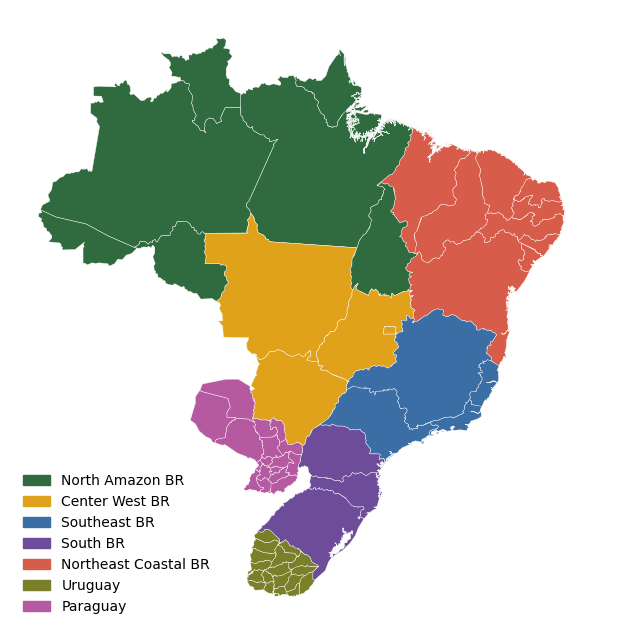

In [57]:
# --- FILTER HYDROCORE SOUTH (BRA/URY/PRY) ---
targets = ["BRA", "URY", "PRY"]
sub_gdf = gdf[gdf["ISO_A3"].isin(targets)].copy()

# --- BRAZIL ADM1 SUBDIVISIONS ---
BRAZIL_REGIONS = {
    "North Amazon BR": [
        "Acre","Amapa","Amazonas","Para","Rondonia","Roraima","Tocantins"
    ],
    "Center West BR": [
        "Goias","Mato Grosso","Mato Grosso Do Sul","Distrito Federal"
    ],
    "Southeast BR": [
        "Espirito Santo","Minas Gerais","Rio De Janeiro","Sao Paulo"
    ],
    "South BR": [
        "Parana","Santa Catarina","Rio Grande Do Sul"
    ],
    "Northeast Coastal BR": [
        "Maranhao","Ceara","Rio Grande Do Norte","Paraiba","Pernambuco",
        "Alagoas","Sergipe","Bahia","Piaui"
    ],
    "Uruguay": [
        "Uruguay"
    ],
    "Paraguay": [
        "Paraguay"
    ]
}

# --- COLORS (7) ---
colors = {
    "North Amazon BR": "#2F6B3F",      # deep green
    "Center West BR": "#E0A21B",       # amber
    "Southeast BR": "#3A6EA5",         # steel blue
    "South BR": "#6D4C9A",             # purple
    "Northeast Coastal BR": "#D85C4A", # coral red
    "Uruguay": "#7A7F2A",              # olive
    "Paraguay": "#B55AA0"              # magenta
}

# --- ASSIGN CLUSTERS ---
sub_gdf["L2_Region"] = None

for region, states in BRAZIL_REGIONS.items():
    if region in ["Uruguay", "Paraguay"]:
        sub_gdf.loc[sub_gdf["NAM_0"] == region, "L2_Region"] = region
    else:
        sub_gdf.loc[sub_gdf["NAM_1"].isin(states), "L2_Region"] = region

# Exclude "Name Unknown"
sub_gdf = sub_gdf[sub_gdf["NAM_1"] != "Name Unknown"].copy()

# --- SIMPLIFY GEOMETRY ---
sub_plot = sub_gdf.copy()
sub_plot["geometry"] = sub_plot["geometry"].simplify(0.05, preserve_topology=True)

# --- PLOT ---
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
sub_plot.plot(
    ax=ax,
    color=sub_plot["L2_Region"].map(colors),
    linewidth=0.3,
    edgecolor="white"
)

legend_handles = [mpatches.Patch(color=colors[k], label=k) for k in colors]
ax.legend(handles=legend_handles, loc="lower left", frameon=False)
ax.set_axis_off()

# --- SAVE ---
base_dir = Path.cwd().parents[0]
out_dir = base_dir / "Maps" / "Layer2" / "LAC"
out_dir.mkdir(parents=True, exist_ok=True)
out_path = out_dir / "L2_LAC_HydrocoreSouth.pdf"
fig.savefig(out_path, dpi=100, bbox_inches="tight")

plt.show()


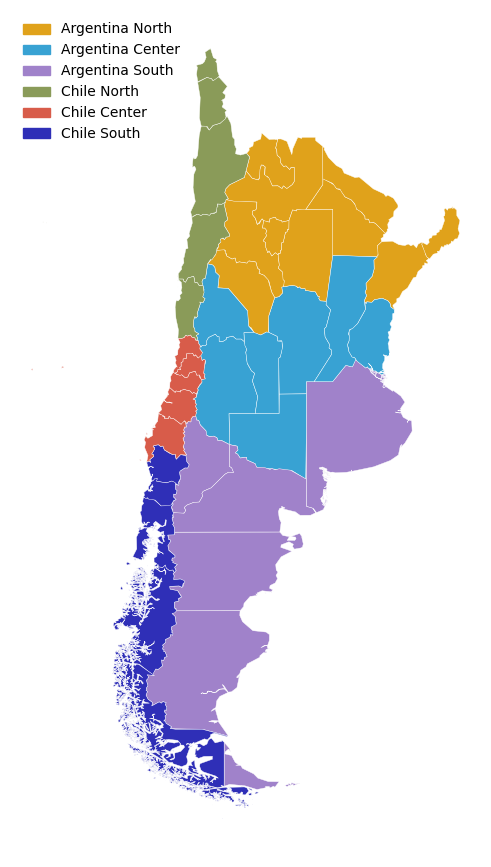

In [58]:
# --- SOUTHERN CONE ADM1 ---
SOUTHERN_CONE = ["Argentina", "Chile"]

SOUTHERN_CONE_REGIONS = {
    "Argentina North": [
        "Jujuy","Salta","Tucuman","Catamarca","La Rioja","Santiago Del Estero",
        "Formosa","Chaco","Corrientes","Misiones"
    ],
    "Argentina Center": [
        "Cordoba","Santa Fe","Entre Rios","San Luis","Mendoza","San Juan","La Pampa"
    ],
    "Argentina South": [
        "Buenos Aires","Buenos Aires D.f.","Neuquen","Rio Negro",
        "Chubut","Santa Cruz","Tierra Del Fuego"
    ],
    "Chile North": [
        "Arica y Painacota","Tarapaca","Antofagasta","Atacama","Coquimbo"
    ],
    "Chile Center": [
        "Valparaiso","Metropolitana","Libertador Gral. Bernardo O'Higgins","Maule","Biobio"
    ],
    "Chile South": [
        "Araucania","Los Rios","Los Lagos","Aisen del Gral. Carlos Ibañez del Campo",
        "Magallanes y Antartica chilena"
    ]
}

colors = {
    "Argentina North": "#E0A21B",
    "Argentina Center": "#38A2D3",
    "Argentina South": "#A082CA",
    "Chile North": "#8A9B59",
    "Chile Center": "#D85C4A",
    "Chile South": "#2F2FB7"
}

# --- ASSIGN ---
sc_gdf = gdf[gdf["NAM_0"].isin(SOUTHERN_CONE)].copy()
sc_gdf["L2_Region"] = None

for region, units in SOUTHERN_CONE_REGIONS.items():
    sc_gdf.loc[sc_gdf["NAM_1"].isin(units), "L2_Region"] = region

# --- SIMPLIFY ---
sc_plot = sc_gdf.copy()
sc_plot["geometry"] = sc_plot["geometry"].simplify(0.05, preserve_topology=True)

# --- PLOT ---
fig, ax = plt.subplots(1, 1, figsize=(10, 11))
sc_plot.plot(
    ax=ax,
    color=sc_plot["L2_Region"].map(colors),
    linewidth=0.3,
    edgecolor="white"
)

legend_handles = [mpatches.Patch(color=colors[k], label=k) for k in colors]
ax.legend(handles=legend_handles, loc="upper left", frameon=False)
ax.set_axis_off()

# --- SAVE ---
base_dir = Path.cwd().parents[0]
out_dir = base_dir / "Maps" / "Layer2" / "LAC"
out_dir.mkdir(parents=True, exist_ok=True)
out_path = out_dir / "L2_LAC_SouthernCone.pdf"
fig.savefig(out_path, dpi=100, bbox_inches="tight")
plt.show()


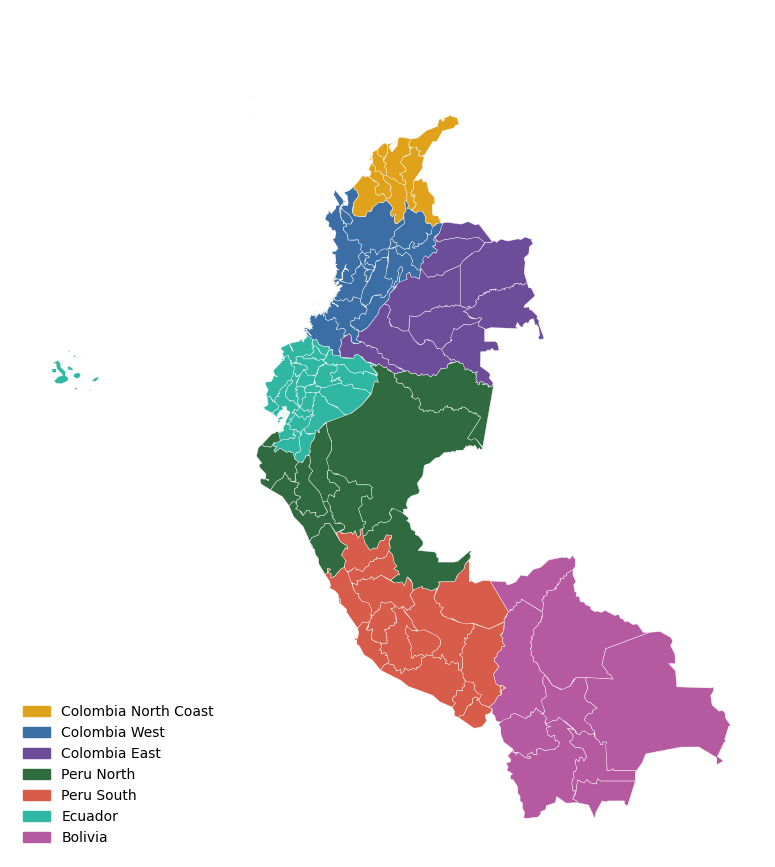

In [59]:
# --- ANDEAN REGION ADM1 ---
ANDEAN = ["Colombia", "Peru", "Ecuador", "Bolivia"]

ANDEAN_REGIONS = {
    # Colombia (3)
    "Colombia North Coast": [
        "Atlántico","Bolívar","Cesar","Córdoba","La Guajira",
        "Magdalena","Sucre","Archipiélago de San Andrés, Providencia y Santa Catalina"
        ,"Norte de Santander"
    ],
    "Colombia West": [
        "Antioquia","Boyacá","Caldas","Chocó","Cundinamarca","Bogotá, D.C.",
        "Huila","Nariño","Quindio","Risaralda","Santander","Tolima",
        "Valle del Cauca","Cauca"
    ],
    "Colombia East": [
        "Amazonas","Arauca","Caquetá","Casanare","Guainía","Guaviare",
        "Meta","Putumayo","Vaupés","Vichada"
    ],

    # Peru (2)
    "Peru North": [
        "Amazonas","Ancash","Cajamarca","La Libertad","Lambayeque",
        "Loreto","Piura","San Martín","Tumbes","Ucayali"
    ],
    "Peru South": [
        "Apurímac","Arequipa","Ayacucho","Cusco","Huancavelica",
        "Huánuco","Ica","Junín","Lima","Callao","Madre de Dios",
        "Moquegua","Puno","Tacna","Pasco"
    ],

    # Ecuador (1)
    "Ecuador": [
        "Azuay","Bolivar","Canar","Carchi","Chimborazo","Cotopaxi",
        "El Oro","Esmeraldas","Galapagos","Guayas","Imbabura","Loja",
        "Los Rios","Manabi","Morona Santiago","Napo","Orellana","Pastaza",
        "Pichincha","Santa Elena","Santo Domingo de los Tsachilas",
        "Sucumbios","Tungurahua","Zamora Chinchipe"
    ],

    # Bolivia (1)
    "Bolivia": [
        "Beni","Chuquisaca","Cochabamba","La Paz","Oruro",
        "Pando","Potosi","Santa Cruz","Tarija"
    ]
}

colors = {
    "Colombia North Coast": "#E0A21B",
    "Colombia West": "#3A6EA5",
    "Colombia East": "#6D4C9A",
    "Peru North": "#2F6B3F",
    "Peru South": "#D85C4A",
    "Ecuador": "#2FB7A3",
    "Bolivia": "#B55AA0"
}

# --- ASSIGN ---
and_gdf = gdf[gdf["NAM_0"].isin(ANDEAN)].copy()
and_gdf["L2_Region"] = None

for region, units in ANDEAN_REGIONS.items():
    and_gdf.loc[and_gdf["NAM_1"].isin(units), "L2_Region"] = region

# --- SIMPLIFY ---
and_plot = and_gdf.copy()
and_plot["geometry"] = and_plot["geometry"].simplify(0.05, preserve_topology=True)

# --- PLOT ---
fig, ax = plt.subplots(1, 1, figsize=(10, 11))
and_plot.plot(
    ax=ax,
    color=and_plot["L2_Region"].map(colors),
    linewidth=0.3,
    edgecolor="white"
)

legend_handles = [mpatches.Patch(color=colors[k], label=k) for k in colors]
ax.legend(handles=legend_handles, loc="lower left", frameon=False)
ax.set_axis_off()

# --- SAVE ---
base_dir = Path.cwd().parents[0]
out_dir = base_dir / "Maps" / "Layer2" / "LAC"
out_dir.mkdir(parents=True, exist_ok=True)
out_path = out_dir / "L2_LAC_Andean.pdf"
fig.savefig(out_path, dpi=100, bbox_inches="tight")

plt.show()



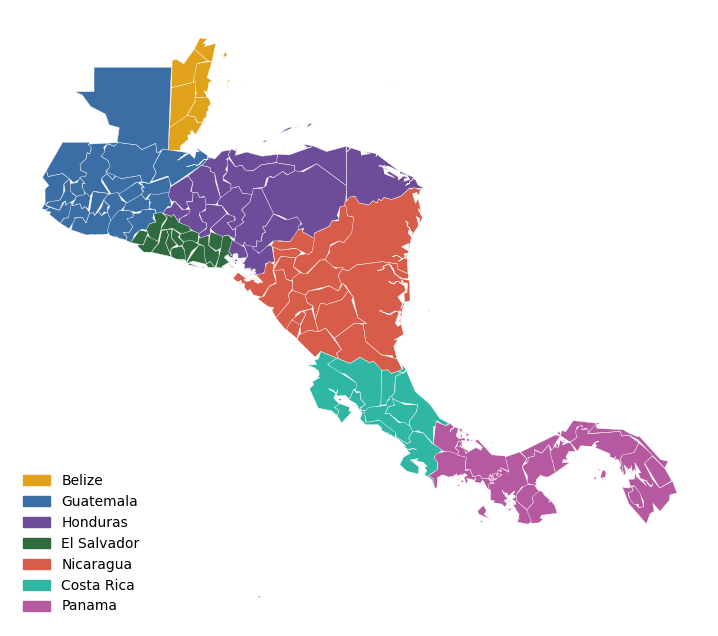

In [60]:
# --- CENTRAL AMERICA ADM1 ---
CENTRAL_AMERICA = ["Belize","Guatemala","Honduras","El Salvador","Nicaragua","Costa Rica","Panama"]

CA_REGIONS = {
    "Belize": ["Belize"],
    "Guatemala": ["Guatemala"],
    "Honduras": ["Honduras"],
    "El Salvador": ["El Salvador"],
    "Nicaragua": ["Nicaragua"],
    "Costa Rica": ["Costa Rica"],
    "Panama": ["Panama"]
}

colors = {
    "Belize": "#E0A21B",
    "Guatemala": "#3A6EA5",
    "Honduras": "#6D4C9A",
    "El Salvador": "#2F6B3F",
    "Nicaragua": "#D85C4A",
    "Costa Rica": "#2FB7A3",
    "Panama": "#B55AA0"
}

# --- ASSIGN ---
ca_gdf = gdf[gdf["NAM_0"].isin(CENTRAL_AMERICA)].copy()
ca_gdf["L2_Region"] = None

for region, names in CA_REGIONS.items():
    ca_gdf.loc[ca_gdf["NAM_0"].isin(names), "L2_Region"] = region

# --- SIMPLIFY ---
ca_plot = ca_gdf.copy()
ca_plot["geometry"] = ca_plot["geometry"].simplify(0.05, preserve_topology=True)

# --- PLOT ---
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ca_plot.plot(
    ax=ax,
    color=ca_plot["L2_Region"].map(colors),
    linewidth=0.3,
    edgecolor="white"
)

legend_handles = [mpatches.Patch(color=colors[k], label=k) for k in colors]
ax.legend(handles=legend_handles, loc="lower left", frameon=False)
ax.set_axis_off()

# --- SAVE ---
base_dir = Path.cwd().parents[0]
out_dir = base_dir / "Maps" / "Layer2" / "LAC"
out_dir.mkdir(parents=True, exist_ok=True)
out_path = out_dir / "L2_LAC_CentralAmerica.pdf"
fig.savefig(out_path, dpi=100, bbox_inches="tight")
plt.show()

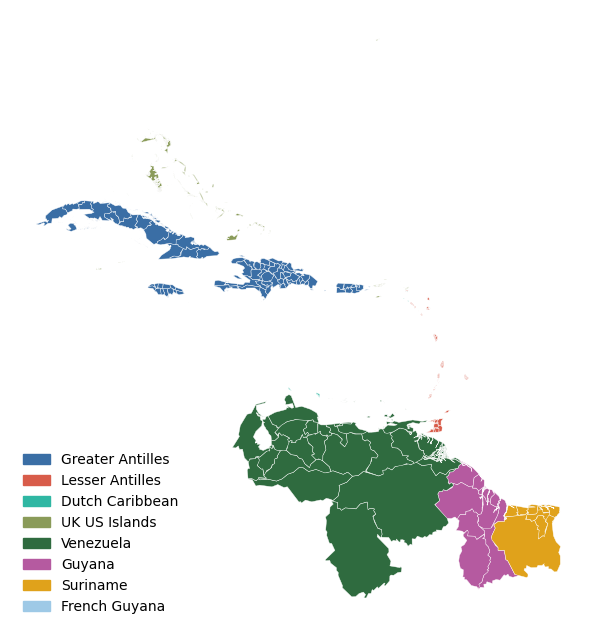

In [61]:
# --- CARIBBEAN ADM1 ---
CARIBBEAN = [
    'Cuba','Haiti','Dominican Republic','Jamaica','Trinidad and Tobago',
    'The Bahamas','Barbados','Grenada','Dominica',
    'Antigua and Barbuda','Saint Kitts and Nevis','Saint Lucia',
    'Saint Vincent and the Grenadines',
    'Anguilla (U.K.)','Aruba (Neth.)','Bermuda (U.K.)','British Virgin Islands (U.K.)',
    'Cayman Islands (U.K.)','Curacao (Neth.)','Montserrat (U.K.)','Puerto Rico (U.S.)',
    'Saint-Barthelemy (Fr.)','Saint-Martin (Fr.)','Sint Maarten (Neth.)',
    'Turks and Caicos Islands (U.K.)','United States Virgin Islands (U.S.)',
    'Republica Bolivariana de Venezuela','Suriname','Guyana','French Guyana',
    'Guadalupe (Fr.)','Martinique (Fr.)','Bonaire, Sint Eustatius and Saba (Neth.)'
]

CARIBBEAN_REGIONS = {
    "Greater Antilles": [
        "Cuba","Haiti","Dominican Republic","Jamaica","Puerto Rico (U.S.)"
    ],
    "Lesser Antilles": [
        "Antigua and Barbuda","Dominica","Grenada","Saint Kitts and Nevis","Saint Lucia",
        "Saint Vincent and the Grenadines","Barbados","Guadalupe (Fr.)","Martinique (Fr.)",
        "Saint-Barthelemy (Fr.)","Saint-Martin (Fr.)","Montserrat (U.K.)",
        "Trinidad and Tobago"
    ],
    "Dutch Caribbean": [
        "Aruba (Neth.)","Curacao (Neth.)","Bonaire, Sint Eustatius and Saba (Neth.)","Sint Maarten (Neth.)"
    ],
    "UK US Islands": [
        "Anguilla (U.K.)","Bermuda (U.K.)","British Virgin Islands (U.K.)",
        "Cayman Islands (U.K.)","Turks and Caicos Islands (U.K.)",
        "United States Virgin Islands (U.S.)",
        "The Bahamas"
    ],
    "Venezuela": [
        "Republica Bolivariana de Venezuela"
    ],
    "Guyana": [
        "Guyana"
    ],
    "Suriname": [
        "Suriname"
    ],
    "French Guyana": [
        "French Guyana"
    ]
}


colors = {
    "Greater Antilles": "#3A6EA5",
    "Lesser Antilles": "#D85C4A",
    "Dutch Caribbean": "#2FB7A3",
    "UK US Islands": "#8A9B59",
    "Venezuela": "#2F6B3F",
    "Guyana": "#B55AA0",
    "Suriname": "#E0A21B",
    "French Guyana": "#9EC9E6"
}

# --- ASSIGN ---
car_gdf = gdf[gdf["NAM_0"].isin(CARIBBEAN)].copy()
car_gdf["L2_Region"] = None

for region, names in CARIBBEAN_REGIONS.items():
    car_gdf.loc[car_gdf["NAM_0"].isin(names), "L2_Region"] = region

# --- SIMPLIFY ---
car_plot = car_gdf.copy()
car_plot["geometry"] = car_plot["geometry"].simplify(0.05, preserve_topology=True)

# --- PLOT ---
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
car_plot.plot(
    ax=ax,
    color=car_plot["L2_Region"].map(colors),
    linewidth=0.3,
    edgecolor="white"
)

legend_handles = [mpatches.Patch(color=colors[k], label=k) for k in colors]
ax.legend(handles=legend_handles, loc="lower left", frameon=False)
ax.set_axis_off()

# --- SAVE ---
base_dir = Path.cwd().parents[0]
out_dir = base_dir / "Maps" / "Layer2" / "LAC"
out_dir.mkdir(parents=True, exist_ok=True)
out_path = out_dir / "L2_LAC_Caribbean.pdf"
fig.savefig(out_path, dpi=100, bbox_inches="tight")
plt.show()



## Europe region